Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


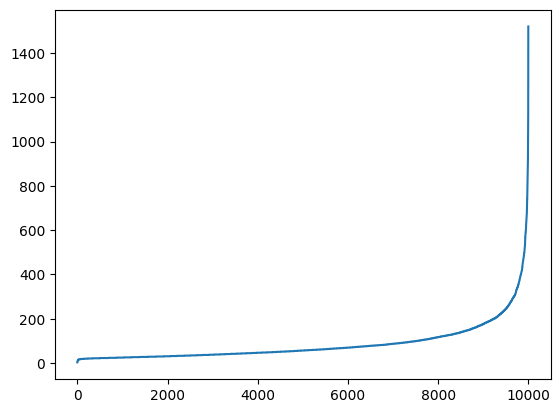

9239
['have', 'been', 'frequent', 'visitor', 'this', 'chain', 'for', 'few', 'years', 'now', 'sad', 'that', 'this', 'restaurant', 'decline', 'and', 'seems', 'that', 'the', 'management', 'completely', 'indifferent', 'had', 'the', 'unfortunate', 'experience', 'having', 'lunch', 'here', 'this', 'afternoon', 'the', 'service', 'poor', 'and', 'the', 'servers', "n't", 'bother', 'listen', 'your', 'requests', 'ordered', 'non', 'spicy', 'vegetarian', 'dish', 'for', 'parents', 'they', "n't", 'eat', 'spicy', 'food', 'when', 'the', 'dish', 'came', 'was', 'with', 'different', 'sauce', 'and', 'loaded', 'with', 'spices', 'the', 'server', 'requested', 'that', 'accept', 'the', 'dish', 'refused', 'and', 'could', 'immediately', 'see', 'his', 'displeasure', 'overall', 'food', 'was', 'average', 'and', 'nothing', 'can', 'feel', 'good', 'about', 'chicken', 'dish', 'tasted', 'stale', "n't", 'waste', 'your', 'money', 'here']
['have', 'always', 'visit', 'this', 'place', 'they', 'always', 'offer', 'good', 'food', 

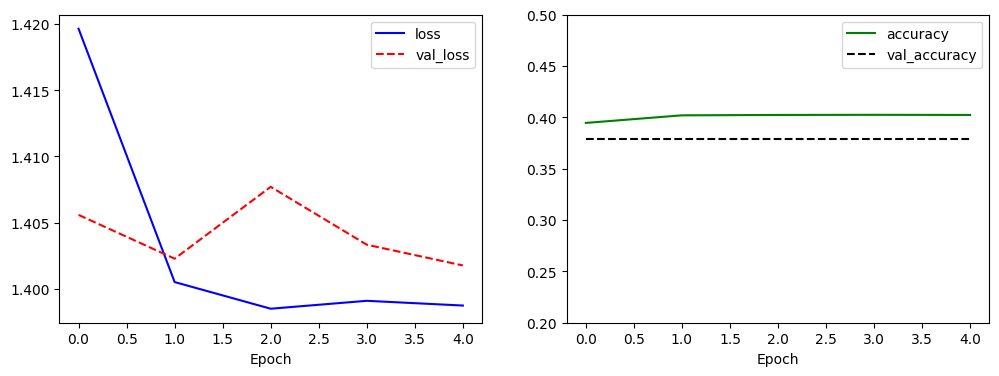

1/1 [==============================] - 0s 321ms/step
['bad']
[0.06519902 0.06409687 0.22446097 0.2606649  0.38557824]
['bad', 'not']
[0.06519902 0.06409687 0.22446097 0.2606649  0.38557824]
['bad', 'not', 'good']
[0.06519902 0.06409688 0.22446097 0.26066494 0.38557824]
['bad', 'not', 'good', 'hotel']
[0.06519901 0.06409687 0.22446097 0.2606649  0.38557824]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Hotel_reviews_20k.csv')

df = df.iloc[:, :2]

train_text = df.iloc[1::2, ]
test_text = df.iloc[0::2, ]


train_text = np.array(train_text)
test_text = np.array(test_text)

train_x = [sentence for sentence in train_text[:, 1]]
test_x = [sentence for sentence in test_text[:, 1]]

train_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in train_text[:, 0]], dtype=np.int32)
test_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in test_text[:, 0]], dtype=np.int32)

import re

import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    return string.lower()


train_text_X = [clean_str(sentence) for sentence in train_x]
sentences = [sentence.split(' ') for sentence in train_text_X]

# 각 문장의 단어 길이 확인
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l <= 200) for l in sentence_len]))

# 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence if len(word) >= 3][:500])
sentences = sentences_new

for i in range(5):
    print(sentences[i])

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, maxlen=500, padding='post')


# Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['frequent', 'always', 'hate'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=500),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_y, epochs=5, batch_size=128, validation_split=0.2)

# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.2, 0.5)
plt.legend()
plt.show()

'''test_text_X = []
for row in test_text.astype(str):
    if np.char.count(row, '\t').any():
        test_text_X.append(row.split('\t')[1])

test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X if len(sentence) > 0]  # 문장이 비어있지 않은 경우만 선택

# 문장의 단어 수가 0인 경우 제외
sentences = [sentence for sentence in sentences if len(sentence) > 0]

# 패딩
if len(sentences) > 0:
    test_x = tokenizer.texts_to_sequences(sentences)
    test_x = pad_sequences(test_x, padding='post')
else:
    test_x = np.array([])  # 데이터가 없는 경우 빈 배열로 초기화

# 모델 평가
if len(test_x) > 0:
    model.evaluate(test_x, test_y, verbose=0)
else:
    print("테스트 데이터가 없습니다.")'''

test_text_X = []
for row in test_text.astype(str):
    test_text_X.append(clean_str(str(row)))

sentences = [sentence.split(' ') for sentence in test_text_X if len(sentence) > 0]

sentences = [sentence for sentence in sentences if len(sentence) > 0]

if len(sentences) > 0:
    test_x = tokenizer.texts_to_sequences(sentences)
    test_x = pad_sequences(test_x, padding='post', maxlen=500)
    model.evaluate(test_x, test_y, verbose=0)
else:
    print("테스트 데이터가 없습니다.")




# 임의의 문장 감성 분석 결과 확인
test_sentence = 'bad not good hotel'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])


test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=500)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])




In [ ]:
test_text_X = []
for row in test_text.astype(str):
    if np.char.count(row, '\t').any():
        test_text_X.append(row.split('\t')[1])

test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X if len(sentence) > 0]  # 문장이 비어있지 않은 경우만 선택

# 문장의 단어 수가 0인 경우 제외
sentences = [sentence for sentence in sentences if len(sentence) > 0]

# 패딩
if len(sentences) > 0:
    test_X = tokenizer.texts_to_sequences(sentences)
    test_X = pad_sequences(test_X, padding='post')
else:
    test_X = np.array([])  # 데이터가 없는 경우 빈 배열로 초기화

# 모델 평가
if len(test_X) > 0:
    model.evaluate(test_X, test_y, verbose=0)
else:
    print("테스트 데이터가 없습니다.")

# 임의의 문장 감성 분석 결과 확인
test_sentence = 'Hotel service is generally good and the food is delicious'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])


test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=200)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])


테스트 데이터가 없습니다.
1/1 [==============================] - 0s 333ms/step
['Hotel']
[0.05976439 0.05989725 0.22813545 0.23551066 0.41669223]
['Hotel', 'service']
[0.05976439 0.05989725 0.22813545 0.23551063 0.41669223]
['Hotel', 'service', 'is']
[0.05976439 0.05989725 0.22813545 0.23551063 0.41669223]
['Hotel', 'service', 'is', 'generally']
[0.0597644  0.05989726 0.22813545 0.23551066 0.4166922 ]
['Hotel', 'service', 'is', 'generally', 'good']
[0.05976439 0.05989725 0.22813545 0.23551063 0.41669223]
['Hotel', 'service', 'is', 'generally', 'good', 'and']
[0.0597644  0.05989727 0.22813545 0.23551069 0.41669223]
['Hotel', 'service', 'is', 'generally', 'good', 'and', 'the']
[0.05976439 0.05989725 0.22813545 0.23551063 0.41669223]
['Hotel', 'service', 'is', 'generally', 'good', 'and', 'the', 'food']
[0.05976439 0.05989725 0.22813545 0.23551066 0.41669223]
['Hotel', 'service', 'is', 'generally', 'good', 'and', 'the', 'food', 'is']
[0.05976439 0.05989725 0.22813545 0.23551066 0.41669223]
['Hotel', 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


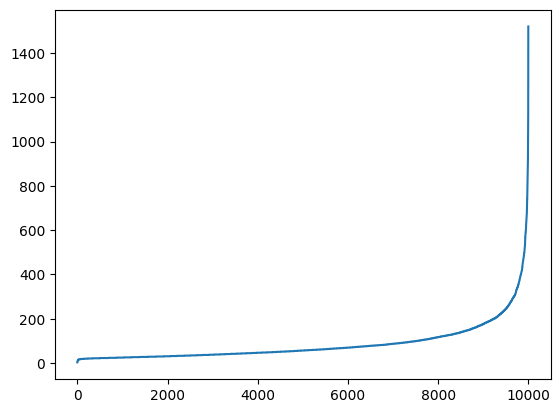

9239
['have', 'been', 'frequent', 'visitor', 'this', 'chain', 'for', 'few', 'years', 'now', 'sad', 'that', 'this', 'restaurant', 'decline', 'and', 'seems', 'that', 'the', 'management', 'completely', 'indifferent', 'had', 'the', 'unfortunate', 'experience', 'having', 'lunch', 'here', 'this', 'afternoon', 'the', 'service', 'poor', 'and', 'the', 'servers', "n't", 'bother', 'listen', 'your', 'requests', 'ordered', 'non', 'spicy', 'vegetarian', 'dish', 'for', 'parents', 'they', "n't", 'eat', 'spicy', 'food', 'when', 'the', 'dish', 'came', 'was', 'with', 'different', 'sauce', 'and', 'loaded', 'with', 'spices', 'the', 'server', 'requested', 'that', 'accept', 'the', 'dish', 'refused', 'and', 'could', 'immediately', 'see', 'his', 'displeasure', 'overall', 'food', 'was', 'average', 'and', 'nothing', 'can', 'feel', 'good', 'about', 'chicken', 'dish', 'tasted', 'stale', "n't", 'waste', 'your', 'money', 'here']
['have', 'always', 'visit', 'this', 'place', 'they', 'always', 'offer', 'good', 'food', 

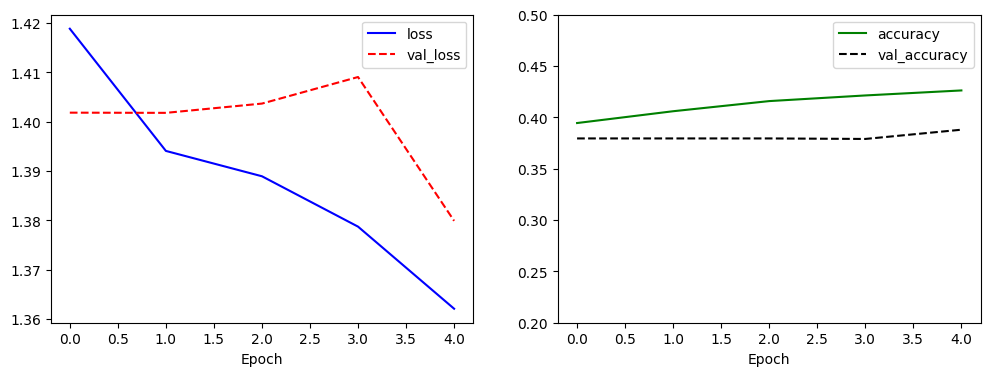

1/1 [==============================] - 0s 330ms/step
Input Sentence: Hotel
Sentiment Prediction: [0.04417211 0.0470374  0.24378379 0.27144507 0.39356163]

Input Sentence: Hotel service
Sentiment Prediction: [0.04417211 0.0470374  0.24378382 0.27144507 0.39356163]

Input Sentence: Hotel service is
Sentiment Prediction: [0.04417211 0.0470374  0.24378382 0.27144507 0.39356163]

Input Sentence: Hotel service is generally
Sentiment Prediction: [0.04417211 0.04703739 0.24378382 0.27144504 0.3935616 ]

Input Sentence: Hotel service is generally good
Sentiment Prediction: [0.0441721  0.0470374  0.24378382 0.27144507 0.39356163]

Input Sentence: Hotel service is generally good and
Sentiment Prediction: [0.04417211 0.0470374  0.24378379 0.27144507 0.39356163]

Input Sentence: Hotel service is generally good and the
Sentiment Prediction: [0.04417211 0.04703739 0.24378382 0.27144504 0.3935616 ]

Input Sentence: Hotel service is generally good and the food
Sentiment Prediction: [0.04417211 0.047037

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Hotel_reviews_20k.csv')

df = df.iloc[:, :2]

train_text = df.iloc[1::2, ]
test_text = df.iloc[0::2, ]


train_text = np.array(train_text)
test_text = np.array(test_text)

train_x = [sentence for sentence in train_text[:, 1]]
test_x = [sentence for sentence in test_text[:, 1]]

train_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in train_text[:, 0]], dtype=np.int32)
test_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in test_text[:, 0]], dtype=np.int32)

import re

import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    return string.lower()


train_text_X = [clean_str(sentence) for sentence in train_x]
sentences = [sentence.split(' ') for sentence in train_text_X]

# 각 문장의 단어 길이 확인
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l <= 200) for l in sentence_len]))

# 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence if len(word) >= 3][:200])
sentences = sentences_new

for i in range(5):
    print(sentences[i])

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, maxlen=200, padding='post')


# Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', 'frequent', 'always', 'hate'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=200),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_y, epochs=5, batch_size=128, validation_split=0.2)

# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.2, 0.5)
plt.legend()
plt.show()


# 테스트 데이터 평가
test_text_X = []
for row in test_text.astype(str):
    if np.char.count(row, '\t').any():
        test_text_X.append(row.split('\t')[1])

test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X if len(sentence) > 0]  # 문장이 비어있지 않은 경우만 선택

# 문장의 단어 수가 0인 경우 제외
sentences = [sentence for sentence in sentences if len(sentence) > 0]

# 패딩
if len(sentences) > 0:
    max_len = max(len(sentence) for sentence in sentences)
    test_X = tokenizer.texts_to_sequences(sentences)
    test_X = pad_sequences(test_X, padding='post', maxlen=max_len)
else:
    test_X = np.array([])  # 데이터가 없는 경우 빈 배열로 초기화

# 임의의 문장 감성 분석 결과 확인
test_sentence = 'Hotel service is generally good and the food is delicious'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

# 최대 문장 길이 확인
max_len = max(len(sentence) for sentence in test_sentences)

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=max_len)
if test_X_1.shape[1] < 200:
    test_X_1 = np.pad(test_X_1, [(0, 0), (0, 200 - test_X_1.shape[1])], mode='constant')

prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
    print('Input Sentence:', ' '.join(sentence))
    print('Sentiment Prediction:', prediction[idx])
    print()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, Dropout

df = pd.read_csv('/content/drive/MyDrive/Hotel_reviews_20k.csv')

df = df.iloc[:, :2]

train_text = df.iloc[1::2, ]
test_text = df.iloc[0::2, ]


train_text = np.array(train_text)
test_text = np.array(test_text)

train_x = [sentence for sentence in train_text[:, 1]]
test_x = [sentence for sentence in test_text[:, 1]]

train_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in train_text[:, 0]], dtype=np.int32)
test_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in test_text[:, 0]], dtype=np.int32)

# Data preprocessing
def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    return string.lower()
train_text_X = [clean_str(str(sentence)) for sentence in train_text]
test_text_X = [clean_str(str(sentence)) for sentence in test_text]


tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train_text_X)

train_X = tokenizer.texts_to_sequences(train_text_X)
test_X = tokenizer.texts_to_sequences(test_text_X)

max_len = 200
train_X = pad_sequences(train_X, maxlen=max_len, padding='post')
test_X = pad_sequences(test_X, maxlen=max_len, padding='post')

# Model definition
model = Sequential()
model.add(Embedding(20000, 300, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_y, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_X, test_y)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions
test_sentences = ['Hotel service is generally good and the food is delicious', 'The room was dirty and the staff was rude']
test_sentences = [clean_str(sentence) for sentence in test_sentences]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post')






predictions = model.predict(test_sequences)
sentiment_labels = ['Negative', 'Neutral', 'Positive']

for i, sentence in enumerate(test_sentences):
    print('Input Sentence:', sentence)
    print('Sentiment Prediction:', sentiment_labels[min(np.argmax(predictions[i]), len(sentiment_labels)-1)])
    print()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          6000000   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          192128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                         

AttributeError: ignored

Mounted at /content/drive


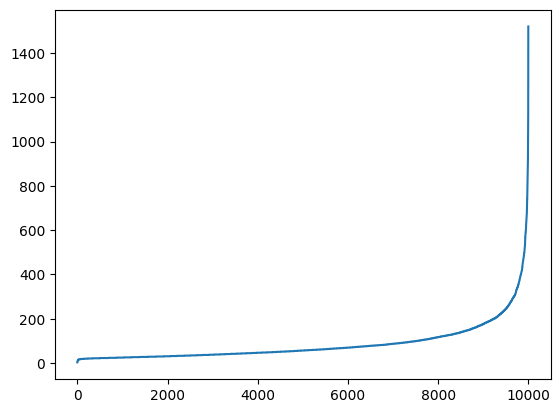

9239
['have', 'been', 'frequent', 'visitor', 'this', 'chain', 'for', 'few', 'years', 'now', 'sad', 'that', 'this', 'restaurant', 'decline', 'and', 'seems', 'that', 'the', 'management', 'completely', 'indifferent', 'had', 'the', 'unfortunate', 'experience', 'having', 'lunch', 'here', 'this', 'afternoon', 'the', 'service', 'poor', 'and', 'the', 'servers', "n't", 'bother', 'listen', 'your', 'requests', 'ordered', 'non', 'spicy', 'vegetarian', 'dish', 'for', 'parents', 'they', "n't", 'eat', 'spicy', 'food', 'when', 'the', 'dish', 'came', 'was', 'with', 'different', 'sauce', 'and', 'loaded', 'with', 'spices', 'the', 'server', 'requested', 'that', 'accept', 'the', 'dish', 'refused', 'and', 'could', 'immediately', 'see', 'his', 'displeasure', 'overall', 'food', 'was', 'average', 'and', 'nothing', 'can', 'feel', 'good', 'about', 'chicken', 'dish', 'tasted', 'stale', "n't", 'waste', 'your', 'money', 'here']
['have', 'always', 'visit', 'this', 'place', 'they', 'always', 'offer', 'good', 'food', 

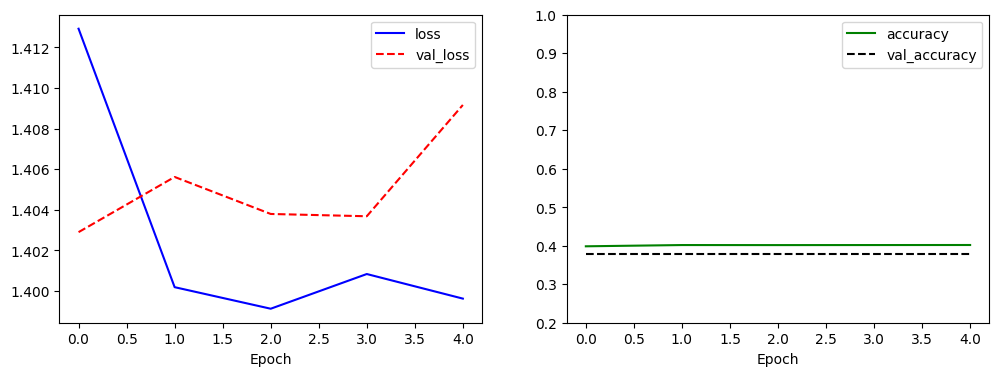

테스트 데이터가 없습니다.
1/1 [==============================] - 0s 379ms/step
['Hotel']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]
['Hotel', 'food']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]
['Hotel', 'food', 'is']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]
['Hotel', 'food', 'is', 'bad']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]
['Hotel', 'food', 'is', 'bad', 'but']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]
['Hotel', 'food', 'is', 'bad', 'but', 'service']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]
['Hotel', 'food', 'is', 'bad', 'but', 'service', 'is']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]
['Hotel', 'food', 'is', 'bad', 'but', 'service', 'is', 'good']
[0.05871254 0.05602365 0.23464957 0.22343412 0.42718014]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Hotel_reviews_20k.csv')

df = df.iloc[:, :2]

train_text = df.iloc[1::2, :]
test_text = df.iloc[0::2, :]

train_text = np.array(train_text)
test_text = np.array(test_text)

train_x = [sentence for sentence in train_text[:, 1]]
test_x = [sentence for sentence in test_text[:, 1]]

train_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in train_text[:, 0]], dtype=np.int32)
test_y = np.array([int(sen)-1 if int(sen) <= 5 else 4 for sen in test_text[:, 0]], dtype=np.int32)

import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    return string.lower()

train_text_X = [clean_str(sentence) for sentence in train_x]
sentences = [sentence.split(' ') for sentence in train_text_X]

# 각 문장의 단어 길이 확인
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l <= 200) for l in sentence_len]))

# 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence if len(word) >= 3][:500])
sentences = sentences_new

for i in range(5):
    print(sentences[i])

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, maxlen=500, padding='post')

# LSTM을 사용한 감성 분석 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=500),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_y, epochs=5, batch_size=128, validation_split=0.2)

# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.2, 1)
plt.legend()
plt.show()

# 테스트 데이터에 대한 예측 및 평가
test_text_X = []
for row in test_text.astype(str):
    if np.char.count(row, '\t').any():
        test_text_X.append(row.split('\t')[1])

test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X if len(sentence) > 0]  # 문장이 비어있지 않은 경우만 선택

# 문장의 단어 수가 0인 경우 제외
sentences = [sentence for sentence in sentences if len(sentence) > 0]

# 패딩
if len(sentences) > 0:
    test_X = tokenizer.texts_to_sequences(sentences)
    test_X = pad_sequences(test_X, padding='post')
else:
    test_X = np.array([])  # 데이터가 없는 경우 빈 배열로 초기화

# 모델 평가
if len(test_X) > 0:
    model.evaluate(test_X, test_y, verbose=0)
else:
    print("테스트 데이터가 없습니다.")

# 임의의 문장 감성 분석 결과 확인
test_sentence = 'Hotel food is bad but service is good'
test_sentence = test_sentence.split(' ')
test_sentences = []
for i in range(1, len(test_sentence) + 1):
    test_sentences.append(test_sentence[:i])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=500)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

